In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df=pd.read_csv('playstoreanalysis.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [4]:
df.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


In [5]:
df.shape

(10841, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   App            10841 non-null  object 
 1   Category       10841 non-null  object 
 2   Rating         9367 non-null   float64
 3   Reviews        10841 non-null  object 
 4   Size           10841 non-null  float64
 5   Installs       10841 non-null  object 
 6   Type           10840 non-null  object 
 7   Price          10841 non-null  object 
 8   ContentRating  10840 non-null  object 
 9   Genres         10841 non-null  object 
 10  LastUpdated    10841 non-null  object 
 11  CurrentVer     10833 non-null  object 
 12  AndroidVer     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

App                 0
Category            0
Rating           1474
Reviews             0
Size                0
Installs            0
Type                1
Price               0
ContentRating       1
Genres              0
LastUpdated         0
CurrentVer          8
AndroidVer          3
dtype: int64

# Data clean up – Missing value treatment

In [8]:
# Drop records where rating is missing since rating is our target/study variable
df.dropna(how='any', subset=['Rating'], axis=0, inplace = True)

In [9]:
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [10]:
df.isnull().sum()


App              0
Category         0
Rating           0
Reviews          0
Size             0
Installs         0
Type             0
Price            0
ContentRating    1
Genres           0
LastUpdated      0
CurrentVer       4
AndroidVer       3
dtype: int64

In [11]:
#Check the null values for the Android Ver column
df.loc[df['AndroidVer'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.00000,"1,000+",Paid,$1.49,Everyone,Personalization,20-Jul-18,4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.00000,"10,000+",Free,0,Everyone,Personalization,27-Mar-18,1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.52952,Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


In [12]:
#Replace remaining missing values with the mode
df['AndroidVer'].fillna(df['AndroidVer'].mode()[0], inplace=True)

In [13]:
df.isnull().sum()

App              0
Category         0
Rating           0
Reviews          0
Size             0
Installs         0
Type             0
Price            0
ContentRating    1
Genres           0
LastUpdated      0
CurrentVer       4
AndroidVer       0
dtype: int64

In [14]:
df.loc[df['CurrentVer'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,6-Jun-18,NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,12-Feb-13,NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,10-May-17,NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,18-Apr-18,NaN,4.0 and up


In [15]:
from numpy import nan

In [16]:
#c. Current ver – replace with most common value
df['CurrentVer'].replace(nan,'Varies with device',inplace=True)


In [17]:
df.isnull().sum()

App              0
Category         0
Rating           0
Reviews          0
Size             0
Installs         0
Type             0
Price            0
ContentRating    1
Genres           0
LastUpdated      0
CurrentVer       0
AndroidVer       0
dtype: int64

In [18]:
df.dtypes

App               object
Category          object
Rating           float64
Reviews           object
Size             float64
Installs          object
Type              object
Price             object
ContentRating     object
Genres            object
LastUpdated       object
CurrentVer        object
AndroidVer        object
dtype: object

# 2. Data clean up – correcting the data types

In [19]:
#Price variable – remove $ sign and convert to float
df['Price'] = df['Price'].str.replace('$', '')

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


In [20]:
df['Price'].loc[7333]

'0.99 '

In [21]:
df.drop(labels=df[df['Price']=='Everyone'].index, inplace = True)

In [22]:
df['Price']=df['Price'].astype('float')

In [23]:
df['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9366, dtype: float64

In [24]:
#Installs – remove ‘,’ and ‘+’ sign, convert to integer
df['Installs'] = df['Installs'].str.replace(',', '')
df['Installs'] = df['Installs'].str.replace('+', '')

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9366, dtype: object

In [26]:
df['Installs']=df['Installs'].astype('int')

In [27]:
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9366, dtype: int32

In [28]:
#Convert all other identified columns to numeric
df['Reviews']= df['Reviews'].astype('int')

In [29]:
df['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 9366, dtype: int32

In [30]:
df['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 9366, dtype: int32

In [31]:
df.dtypes

App               object
Category          object
Rating           float64
Reviews            int32
Size             float64
Installs           int32
Type              object
Price            float64
ContentRating     object
Genres            object
LastUpdated       object
CurrentVer        object
AndroidVer        object
dtype: object

# Sanity checks – check for the following and handle accordingly

In [32]:
#Avg. rating should be between 1 and 5, as only these values are allowed on the play store
df.loc[df.Rating <1] & df.loc[df.Rating >5]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer


All hthe ratings are between 1 and 5

In [33]:
#Reviews should not be more than installs as only those who installed can review the app
df.loc[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.00000,1,Free,0.00,Everyone,Medical,2-Aug-18,1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.52952,10000,Paid,2.49,Everyone,Lifestyle,30-Jul-18,Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.00000,1,Paid,1.49,Everyone,Arcade,8-Feb-17,1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.00000,5,Free,0.00,Everyone,Arcade,23-Jul-18,1,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.00000,10,Free,0.00,Everyone,Arcade,11-Mar-17,0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.00000,10,Free,0.00,Teen,Social,23-Jul-18,1,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.00000,1,Paid,0.99,Everyone,Arcade,3-Mar-17,1,2.3 and up


In [34]:
#Are there any such records? Drop if so.
temp=df.loc[df['Reviews'] > df['Installs']].index


In [35]:
df.drop(labels=temp,inplace=True)

In [36]:
df.loc[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer


# 4. Identify and handle outliers –

<AxesSubplot:>

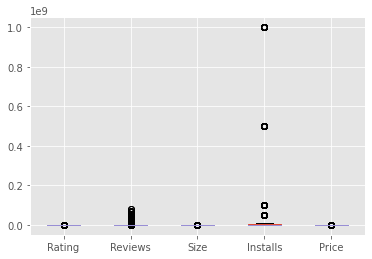

In [37]:
df.boxplot()

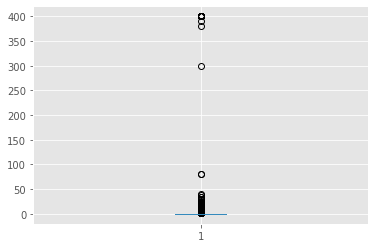

In [38]:
#i. Make suitable plot to identify outliers in price
plt.boxplot(df['Price'])
plt.show()

In [39]:
#ii. Do you expect apps on the play store to cost $200? Check out these cases
df.loc[df['Price'] > 200]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,16-Jul-18,1,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,11-Mar-18,1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,3-May-18,1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,12-Jan-18,2,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,19-May-18,3,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,21-Jul-18,1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,12-Nov-17,1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,1-Jul-18,1,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,11-Dec-17,1,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,1-May-17,3.4,4.4 and up


In [40]:
#iv. Limit data to records with price < $30
gret = df[df['Price']>30].index
df.drop(labels=gret, inplace=True)

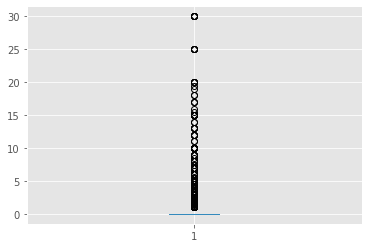

In [41]:
#iv. After dropping the useless records, make the suitable plot again to identify outliers
plt.boxplot(df['Price'])
plt.show()

# Reviews column

In [42]:
#Limit data to apps with < 1 Million reviews
gret_1m = df[df['Reviews'] > 1000000 ].index
df.drop(labels = gret_1m, inplace=True)
print(gret_1m.value_counts().sum(),'cols dropped')

704 cols dropped


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


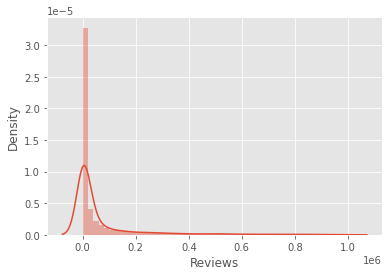

In [43]:
sn.distplot(df['Reviews'])
plt.show()

# Installs

In [44]:
percentile = df.Installs.quantile(0.95) #95th Percentile of Installs
print(percentile,"is 95th percentile of Installs")

10000000.0 is 95th percentile of Installs


In [45]:
 for i in range(0,101,1):
    print(' the {} percentile of installs is {} '.format(i,np.percentile(df['Installs'],i)))

 the 0 percentile of installs is 5.0 
 the 1 percentile of installs is 50.0 
 the 2 percentile of installs is 100.0 
 the 3 percentile of installs is 100.0 
 the 4 percentile of installs is 100.0 
 the 5 percentile of installs is 100.0 
 the 6 percentile of installs is 500.0 
 the 7 percentile of installs is 500.0 
 the 8 percentile of installs is 1000.0 
 the 9 percentile of installs is 1000.0 
 the 10 percentile of installs is 1000.0 
 the 11 percentile of installs is 1000.0 
 the 12 percentile of installs is 1000.0 
 the 13 percentile of installs is 1000.0 
 the 14 percentile of installs is 1000.0 
 the 15 percentile of installs is 1000.0 
 the 16 percentile of installs is 5000.0 
 the 17 percentile of installs is 5000.0 
 the 18 percentile of installs is 5000.0 
 the 19 percentile of installs is 5000.0 
 the 20 percentile of installs is 5000.0 
 the 21 percentile of installs is 10000.0 
 the 22 percentile of installs is 10000.0 
 the 23 percentile of installs is 10000.0 
 the 24 pe

In [46]:
per_95 = df[df["Installs"] > percentile].index
df.drop(labels = per_95, inplace = True)
print(per_95.value_counts().sum())

199


In [47]:
from scipy.stats import norm

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The skewness of this distribution is -1.7434270330647985
The mean 4.170800237107298 and median 4.3 of rating is


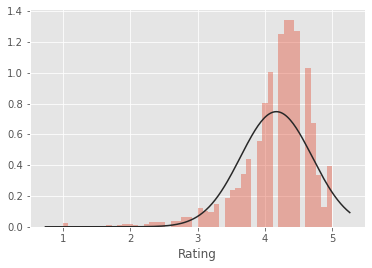

In [48]:
ax = sn.distplot(df.Rating, fit=norm, kde=False)
print('The skewness of this distribution is',df['Rating'].skew())
a=df.Rating.mean()
b=df.Rating.median()
print(f'The mean {a} and median {b} of rating is')

In [49]:
print("Top content raing count")
df['ContentRating'].value_counts()

Top content raing count


Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: ContentRating, dtype: int64

In [50]:
#dropping fewer records from the dataset for brtter analyzation
unrated = df[df["ContentRating"] == 'Unrated'].index
df.drop(labels=unrated, inplace=True)
print('droped cols',unrated)

droped cols Int64Index([8266], dtype='int64')


In [51]:
print("Top content raing count")
df['ContentRating'].value_counts()

Top content raing count


Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Name: ContentRating, dtype: int64

# 7. Effect of size on rating

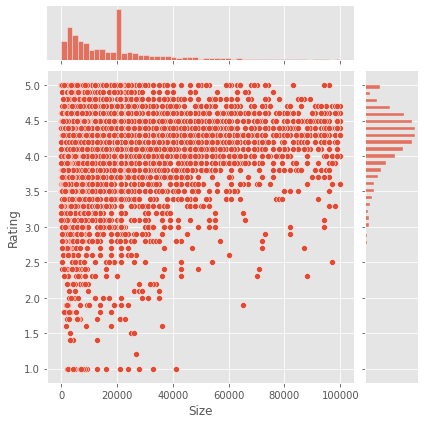

In [52]:
sn.jointplot(data=df, x="Size", y="Rating")

#Do you see any patterns?
Yes there is poitive correlation between size and rating ,as the rating is high the size of apps are also more according to the rating

# 8. Effect of price on rating

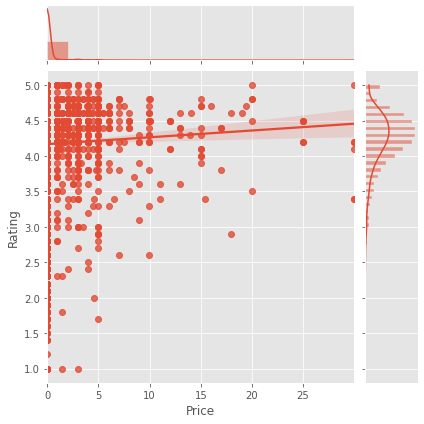

In [53]:
sn.jointplot(data=df, x="Price", y="Rating", kind="reg")

#b. What pattern do you see?
There is a postitive correlation between the price and rating ,if the rating is high the price of rating also increases

In [54]:
#considering the data wich is greater than zero
grt0= df.loc[df.Price >0] 

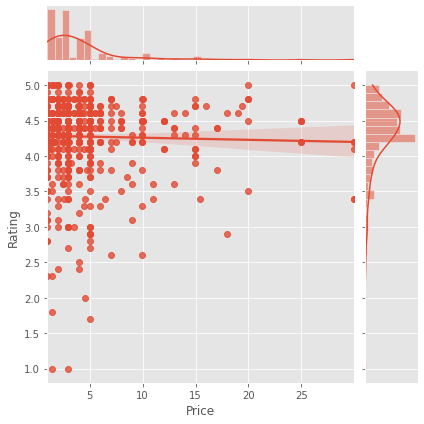

In [55]:
#plotting on the data in which price is greater than zero
sn.jointplot(data=grt0, x="Price", y="Rating", kind="reg")

#Does the pattern change?
Yes the pattern change as we can see the regression line have slightly went down ,so there is negative-correlation between price and rating when we not consder price>0 

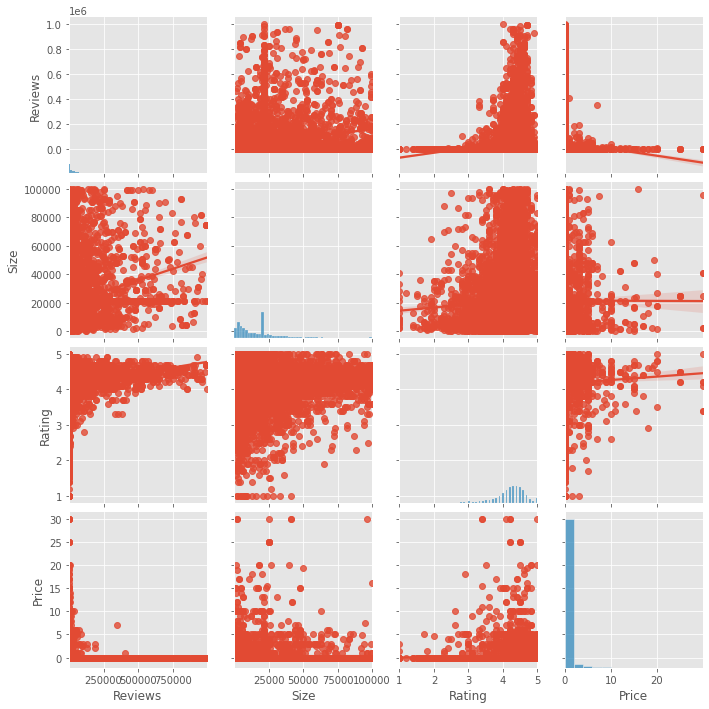

In [62]:
#a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'
sn.pairplot(df, vars=['Reviews', 'Size', 'Rating', 'Price'], kind='reg')
plt.show()

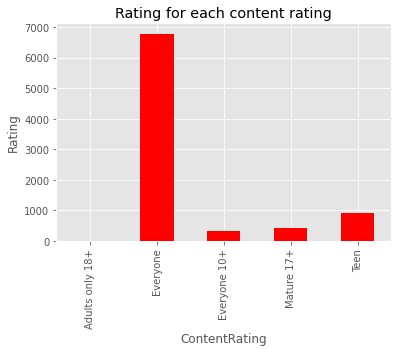

In [66]:
#bar plot displaying the rating for each content rating
df.groupby(['ContentRating'])['Rating'].count().plot.bar(color="red")
plt.title('Rating for each content rating')
plt.ylabel('Rating')
plt.show()

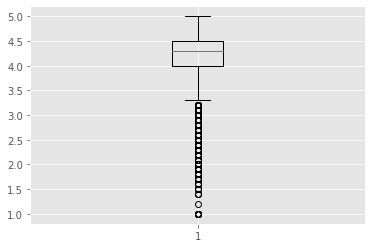

In [67]:
#mean,median
plt.boxplot(df['Rating'])
plt.show()

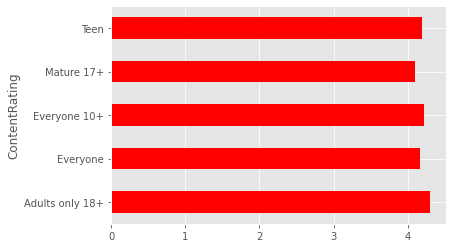

In [69]:
#plot metric
df.groupby(['ContentRating'])['Rating'].mean().plot.barh(color="red")
plt.show()

In [71]:
#Content rating vs. size vs. rating – 3 variables at a time
bins=[0, 20000, 40000, 60000, 80000, 100000]
df['BucketSize'] = pd.cut(df['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(df, values='Rating', index='BucketSize', columns='ContentRating')

ContentRating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen
BucketSize,,,,,
0-20k,4.6,4.145730,4.247561,4.010582,4.182240
20k-40k,3.8,4.200195,4.169811,4.156291,4.170432
40k-60k,4.5,4.167083,4.263636,4.190476,4.237383
60k-80k,NaN,4.245408,4.280769,4.200000,4.274194
80k-100k,NaN,4.260127,4.304762,4.252632,4.270313


In [73]:
#By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination
per20=pd.pivot_table(df, values='Rating', index='BucketSize', columns='ContentRating', aggfunc=lambda x:np.quantile(x,0.2))
per20

ContentRating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen
BucketSize,,,,,
0-20k,4.6,3.80,4.02,3.5,3.9
20k-40k,3.8,4.00,4.00,4.0,3.9
40k-60k,4.5,3.90,4.06,4.1,4.0
60k-80k,NaN,4.00,4.00,4.0,4.0
80k-100k,NaN,4.04,4.10,4.0,4.0


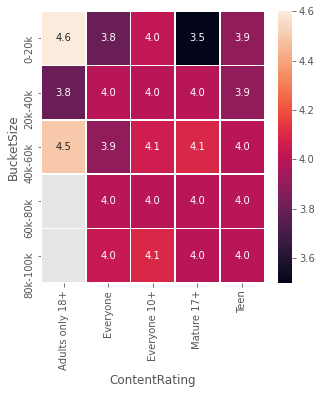

In [74]:
#Make a heatmap of this
#i. Annotated
f,ax = plt.subplots(figsize=(5, 5))
sn.heatmap(per20, annot=True, linewidths=.5, fmt='.1f',ax=ax)
plt.show()

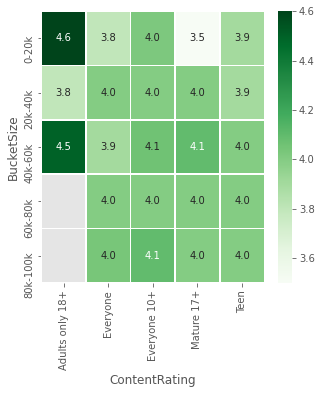

In [75]:
#ii. Greens color map
f,ax = plt.subplots(figsize=(5, 5))
sn.heatmap(per20, annot=True, linewidths=.5, cmap='Greens',fmt='.1f',ax=ax)
plt.show()